# Final Project

## Option
- `option (a)` - perform an analysis of lyrics of popular music

## Topic
- Profiling the progression of the music/lyrics of a musician (change over time)

The deliveries of your project include:

- Paper (information is in the end of this document)
- Code
- features_pca files (csv format, when not downloaded from Canavs)

For convenience, a different entry in Canvas for each delivery will be created, but only the paper entry will be gradable.

Each project needs to include at least two of the following:
- Classification
- Regression
- Unsupervised learning

---

# Steps
## Preprocess
1. Clean features_pca set by shifting two rows with had offset values to the left, and delete the last column.
    - print(data.isnull().sum())
2. Drop 'Path' and 'Class' columns for analysis

# Code
## Using Regression, Classification, and Unsupervised Learning

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1

    accuracy                           0.95        19
   macro avg       0.89      0.83      0.85        19
weighted avg       1.00      0.95      0.96        19

[[5 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 1]]
Regression Mean Absolute Error: 2.7889
Regression Correlation Coefficient: 0.7327


c:\Users\Jared\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jared\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jared\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


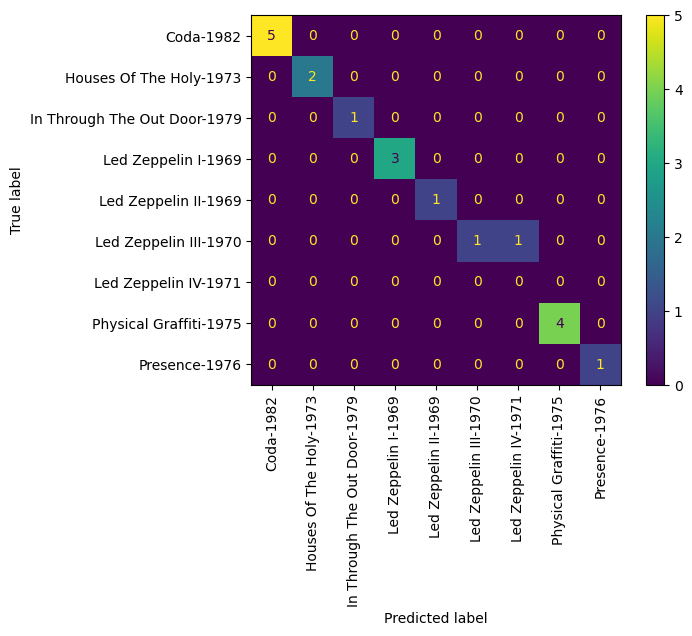

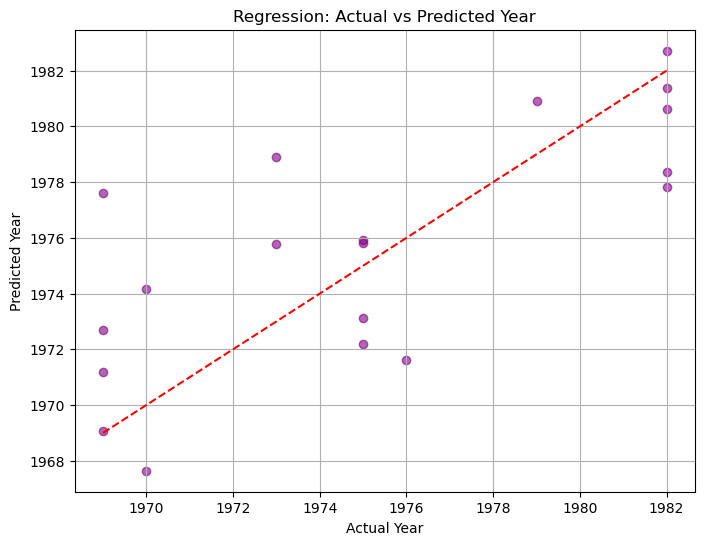

c:\Users\Jared\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


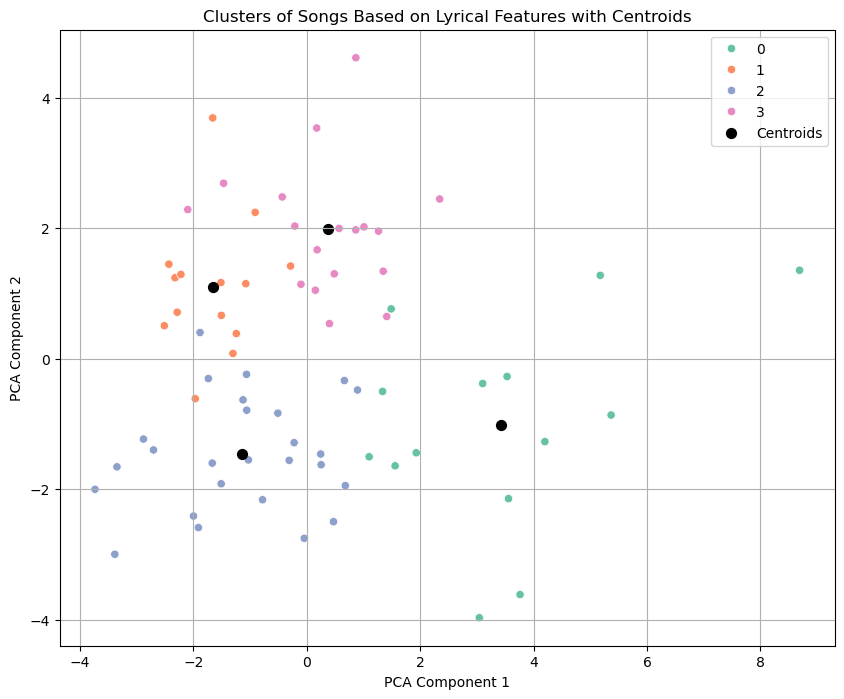

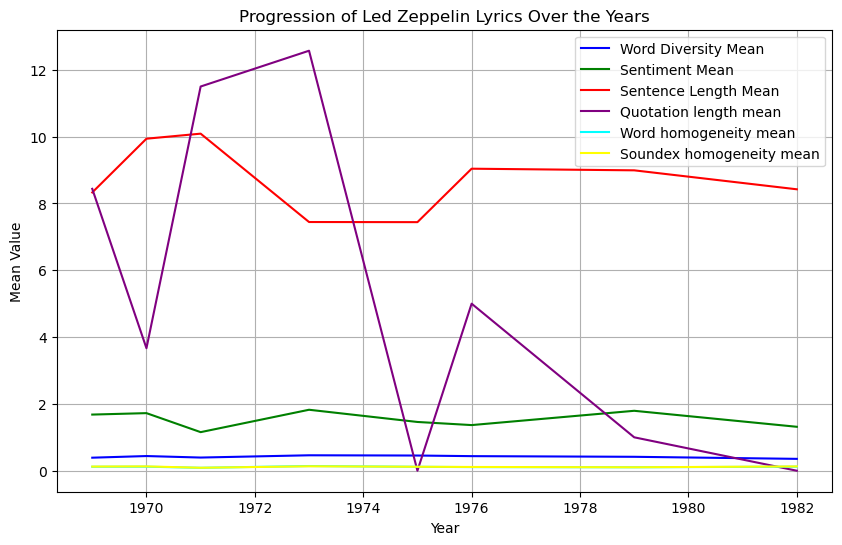

In [ ]:
import pandas as pd
import numpy
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    classification_report,
    mean_absolute_error,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn

seed = 42
test_set_size = 0.25

# Load the dataset
df = pd.read_csv("LedZeppelin.csv")

# Select features for analysis
selected_features = [
    "Path", "Class",
    "Quotation length mean", "Quotation length stddev", "Coleman–Liau index", "Emotion circumplex",
    "Total number of words", "Word diversity", "Automated readability index",
    "positive words frequency", "negative words frequency", "happiness words frequency", "happy words frequency",
    "Soundex diversity", "Soundex homogeneity mean", "Soundex homogeneity StdDev",
    "Sentence length mean", "Sentiment mean", "Sentiment stddev",
    "Word homogeneity mean", "Word homogeneity StdDev",
    "Sentiment skewness", "Sentiment maximum difference", "Sentiment mean difference",
    "Lemma diversity"
]
df = df[selected_features]

# Extract year from the 'Class' column; set as separate column in regression_df for regression model
regression_df = df
regression_df["Year"] = df["Class"].str.extract(r'(\d{4})').astype(int)

####################################################################################################################################
''' Classification of albums based on features '''

# Encode 'Album' as label for classification
label_encoder = LabelEncoder()
df["Class_Label"] = label_encoder.fit_transform(df["Class"])

# Drop both Class and Path from dataset
df = df.drop(["Class", "Path"], axis=1)

# Classification: Predicting 'Class' (album) from lyrical features
# Opted to use `train_test_split` to allow for reproducibility
x_train, x_test, y_train, y_test = train_test_split(
    df, df["Class_Label"], test_size=test_set_size, random_state=seed
)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=seed)
classifier.fit(x_train, y_train)

# Evaluate classification
y_pred = classifier.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get album names corresponding to the Class_Label
album_names = label_encoder.inverse_transform(df["Class_Label"].unique())

# Confusion Matrix with album names
conf_matrix = confusion_matrix(y_test, y_pred, labels=df["Class_Label"].unique())

ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=album_names
).plot(xticks_rotation="vertical")

####################################################################################################################################
''' Regression: Predicting year of song based on features '''

regression_df = regression_df.drop(["Class", "Path"], axis=1)
x = regression_df.drop("Year", axis=1)

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    x, regression_df["Year"], test_size=test_set_size, random_state=seed
)

regressor = LinearRegression()
regressor.fit(x_train_reg, y_train_reg)

# Evaluate regression
y_pred_reg = regressor.predict(x_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Regression Mean Absolute Error: {mae:.4f}")

correlation = numpy.corrcoef(y_test_reg, y_pred_reg)[0, 1]
print(f"Regression Correlation Coefficient: {correlation:.4f}")

# Plotting Regression Model Performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, color="purple", alpha=0.6)
plt.plot(
    [y_test_reg.min(), y_test_reg.max()],
    [y_test_reg.min(),
    y_test_reg.max()],
    color="red",
    linestyle="--",
    label="Regression Line"
)
plt.title("Regression: Actual vs Predicted Year")
plt.xlabel("Actual Year")
plt.ylabel("Predicted Year")
plt.grid(True)
plt.show()

####################################################################################################################################
''' Unsupervised Learning: K-Means clustering of songs '''

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
df["PCA1"] = x_pca[:, 0]
df["PCA2"] = x_pca[:, 1]

kmeans = KMeans(n_clusters=4, random_state=seed)
df["Cluster"] = kmeans.fit_predict(x_scaled)

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)  # Transform the centroids to PCA space

# Visualize Clusters with Centroids
plt.figure(figsize=(10, 8))
seaborn.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set2")

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c="black", marker='.', label="Centroids")

plt.title("Clusters of Songs Based on Lyrical Features with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

####################################################################################################################################
''' Group the data by Year to calculate statistics (mean, & std) '''

# Group key features by year and aggregate mean and standard deviation for each
lyrics_progression = df.groupby("Year").agg({
    "Word diversity": ["mean", "std"],
    "Sentiment mean": ["mean", "std"],
    "Sentence length mean": ["mean", "std"],
    "Quotation length mean": ["mean", "std"],
    "Word homogeneity mean": ["mean", "std"],
    "Soundex homogeneity mean": ["mean", "std"],
}).reset_index()

# Flatten the column names (multi-level index) from the aggregation
lyrics_progression.columns = [
    "Year", 
    "Word Diversity Mean", "Word Diversity Std", 
    "Sentiment Mean", "Sentiment Std", 
    "Sentence Length Mean", "Sentence Length Std",
    "Quotation length mean", "Quotation length stddev",
    "Word homogeneity mean", "Word homogeneity StdDev",
    "Soundex homogeneity mean", "Soundex homogeneity StdDev",
]

# Plot the progression of lyrics over the years
plt.figure(figsize=(10, 6))
seaborn.lineplot(
    data=lyrics_progression, x="Year", y="Word Diversity Mean", label="Word Diversity Mean", color="blue"
)
seaborn.lineplot(
    data=lyrics_progression, x="Year", y="Sentiment Mean", label="Sentiment Mean", color="green"
)
seaborn.lineplot(
    data=lyrics_progression, x="Year", y="Sentence Length Mean", label="Sentence Length Mean", color="red"
)
seaborn.lineplot(
    data=lyrics_progression, x="Year", y="Quotation length mean", label="Quotation length mean", color="purple"
)
seaborn.lineplot(
    data=lyrics_progression, x="Year", y="Word homogeneity mean", label="Word homogeneity mean", color="cyan"
)
seaborn.lineplot(
    data=lyrics_progression, x="Year", y="Soundex homogeneity mean", label="Soundex homogeneity mean", color="yellow"
)

plt.title("Progression of Led Zeppelin Lyrics Over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True)
plt.show()

